# Customer and Marketing Analytics - Segmentation Analytics

In [182]:
#Import the libraries needed for the analysis
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler as ss
from scipy.cluster.hierarchy import dendrogram, linkage#tree-like and linkage: cluster mode
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle as pc

In [28]:
#import the data to be used for the customer analytics
data_seg=pd.read_csv("segmentation data.csv", index_col=0)

In [27]:
#Exploring the data uploaded
data_seg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
Marital status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
Age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
Education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
Income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
Occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
Settlement size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


In [4]:
 #Finding the correlation coefficients between the data segment variables

In [5]:
data_seg.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1, 'Correlation Between the Customer Segmentation Variables')

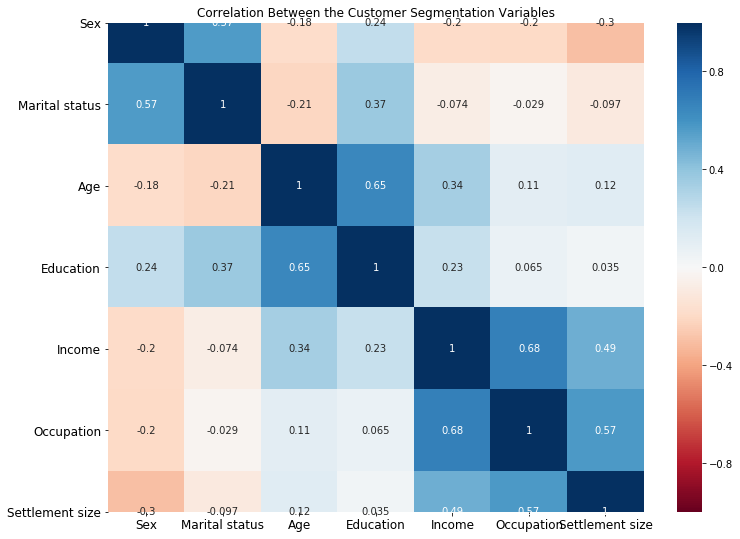

In [6]:
#Putting the data segment in heatmap
plt.figure(figsize=(12,9))
heatmap=sns.heatmap(data_seg.corr(),
                   annot=True, cmap="RdBu",
                   vmin=-1, vmax=1)
heatmap.set_yticklabels(heatmap.get_yticklabels(),rotation=0, fontsize=12)
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=0, fontsize=12)
plt.title("Correlation Between the Customer Segmentation Variables")

Text(0.5, 1.0, "Relationship between Consumer's Age and Income")

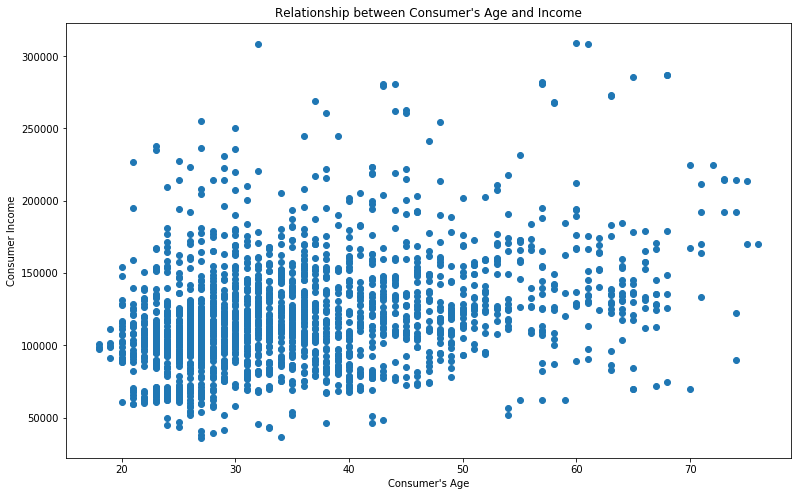

In [7]:
#Show the relationship between in scatter plot
plt.figure(figsize=(13,8))
plt.scatter(data_seg.iloc[:,2], data_seg.iloc[:, 4])
plt.xlabel("Consumer's Age")
plt.ylabel("Consumer Income")
plt.title("Relationship between Consumer's Age and Income")

In [8]:
#Standardisation of the data used for the further analysis
scaler=ss()
data_seg_std=scaler.fit_transform(data_seg)


## Hierarachy Customer Segmentation

In [9]:
hier_seg=linkage(data_seg_std, method="ward")

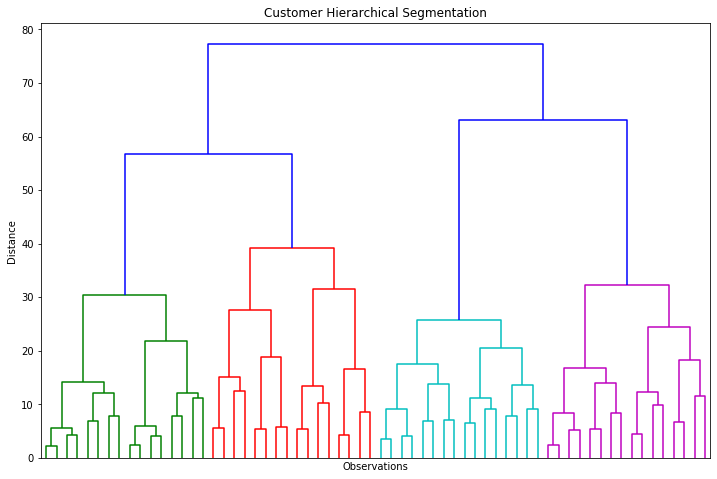

In [11]:
plt.figure(figsize=(12,8))
plt.title("Customer Hierarchical Segmentation")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hier_seg, show_leaf_counts=False,
           truncate_mode="level",p=5,
          no_labels=True)
plt.show()

## Flat Customer Segmentation Using Kmeans

In [12]:
wcss=[]
for x in range(1,15):
    kmeans=KMeans(n_clusters=x, init="k-means++", random_state=42)
    kmeans.fit(data_seg_std)
    wcss.append(kmeans.inertia_)

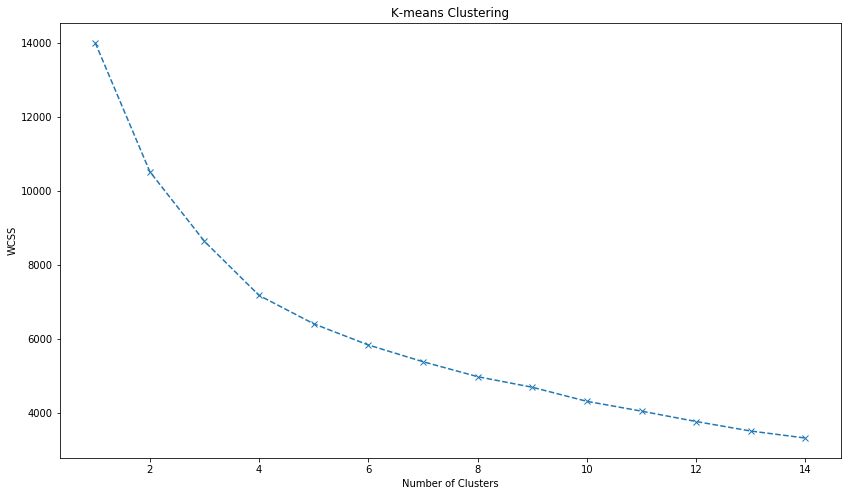

In [13]:
plt.figure(figsize=(14, 8))
plt.plot(range(1,15), wcss, marker="x", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans.fit(data_seg_std)

KMeans(n_clusters=4, random_state=42)

In [15]:
data_seg_kmeans=data_seg.copy()
data_seg_kmeans["Segment K-means"]=kmeans.labels_

In [16]:
data_seg_analysis=data_seg_kmeans.groupby(["Segment K-means"]).mean()
data_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [106]:
data_seg_analysis['N Obs']=data_seg_kmeans[["Segment K-means","Sex"]].groupby(["Segment K-means"]).count()
data_seg_analysis["Prop Obs"]=data_seg_analysis["N Obs"]/data_seg_analysis["N Obs"].sum()

In [108]:
data_seg_analysis.rename({0: "Well-off",
                          1: "Fewer Opportunities",
                          2: "Standard",
                          3: "Career Focused"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
Well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Career Focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [19]:
data_seg_kmeans["Labels"]=data_seg_kmeans["Segment K-means"].map({0: "Well-off",
                          1: "Fewer Opportunities",
                          2: "Standard",
                          3: "Career Focused"})

Text(0.5, 1.0, 'Customer Segmentation K-means')

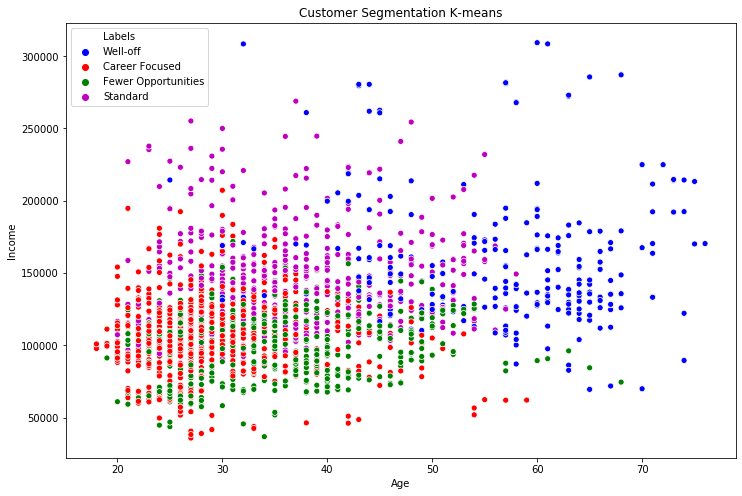

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(data_seg_kmeans["Age"],data_seg_kmeans["Income"], hue=data_seg_kmeans["Labels"], palette=["b","r","g","m"])
plt.title("Customer Segmentation K-means")

# Principal Component Analysis (PCA) - Dimensionality Reduction

In [21]:
pca=PCA()
pca.fit(data_seg_std)

PCA()

In [22]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

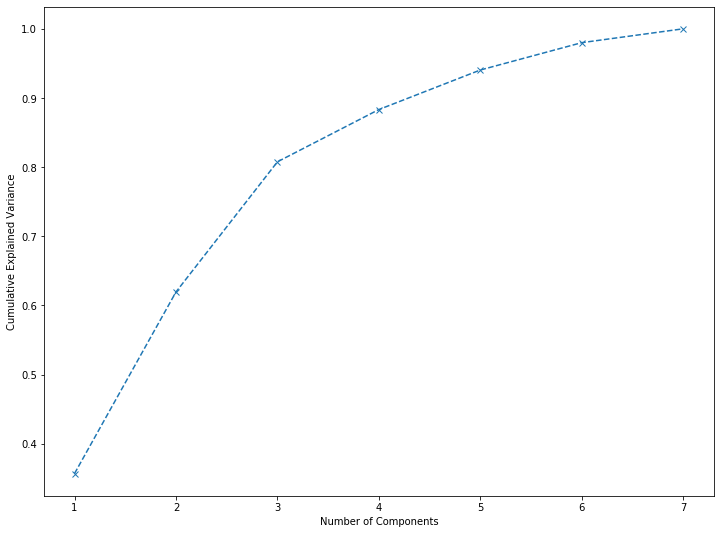

In [23]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker="x", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [25]:
#Rule of thumbs is to keep 70 or 80% of the cummulative variances
pca=PCA(n_components=3)
pca.fit(data_seg_std)

PCA(n_components=3)

In [29]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [32]:
dt_pca_comp=pd.DataFrame(data=pca.components_, 
                         columns=data_seg.columns.values, 
                        index=["Component 1", "Component 2", "Component 3"])
dt_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x16edc938d88>,
 <a list of 3 Text yticklabel objects>)

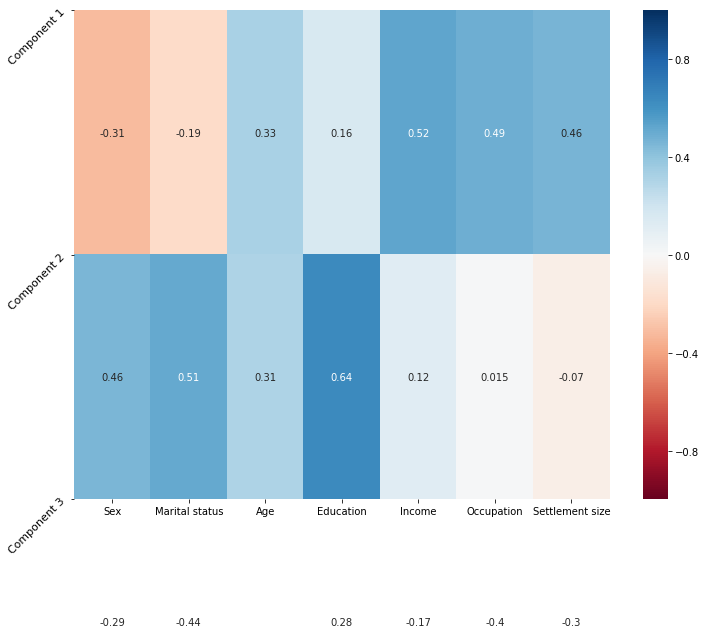

In [44]:
plt.figure(figsize=(12,9))
sns.heatmap(dt_pca_comp,
           vmin=-1,
           vmax=1,
           cmap="RdBu",
           annot=True)
plt.yticks([0,1,2], 
       ["Component 1", "Component 2", "Component 3"],
          rotation=45,
          fontsize=11)

In [78]:
pca.transform(data_seg_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [79]:
score_pca=pca.transform(data_seg_std)

In [80]:
wcss=[]
for x in range(1,15):
    kmeans_pca=KMeans(n_clusters=x, init="k-means++", random_state=42)
    kmeans_pca.fit(score_pca)
    wcss.append(kmeans_pca.inertia_)

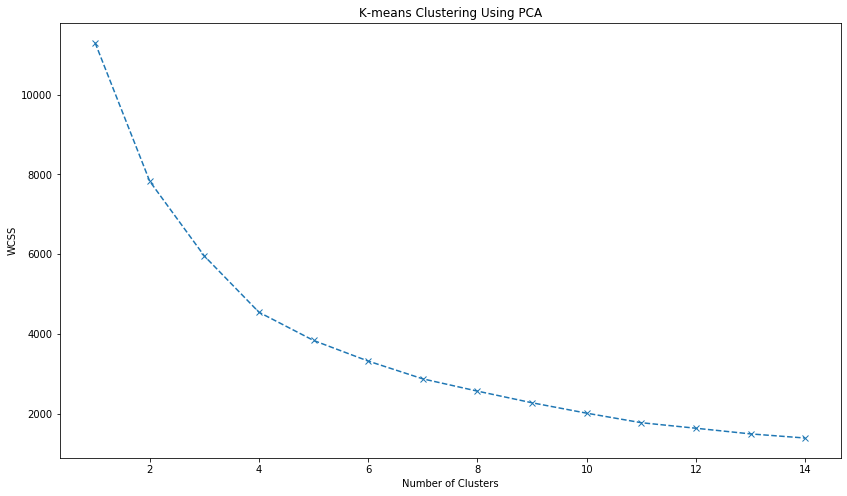

In [81]:
plt.figure(figsize=(14, 8))
plt.plot(range(1,15), wcss, marker="x", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering Using PCA")
plt.show()

In [82]:
kmeans_pca=KMeans(n_clusters=4, init="k-means++", random_state=42)


In [83]:
kmeans_pca.fit(score_pca)

KMeans(n_clusters=4, random_state=42)

# K-means Clustering with PCA

In [166]:
data_seg_pca_kmeans=pd.concat([data_seg.reset_index(drop=True), pd.DataFrame(score_pca)], axis=1)
data_seg_pca_kmeans.columns.values[-3:]=["Component 1", "Component 2", "Component 3"]
data_seg_pca_kmeans["Segment K-means PCA"]=kmeans_pca.labels_

In [167]:
data_seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [143]:
data_seg_pca_kmeans_freq=data_seg_pca_kmeans.groupby(["Segment K-means PCA"]).mean()
data_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


In [144]:
data_seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [155]:
data_seg_pca_kmeans_freq["N Obs"] =data_seg_pca_kmeans[["Segment K-means PCA", "Sex"]].groupby(["Segment K-means PCA"]).count()
data_seg_pca_kmeans_freq["Prop Obs"]=data_seg_pca_kmeans_freq["N Obs"]/data_seg_pca_kmeans_freq["N Obs"].sum()

#data_seg_pca_kmeans


In [157]:
data_seg_pca_kmeans_freq.rename({0: "Standard",
                          1: "Career-focused",
                          2: "Fewer opportunities",
                          3: "Well-off"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
Standard,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
Career-focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
Fewer opportunities,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
Well-off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


In [171]:
data_seg_pca_kmeans["Lengend"]=data_seg_pca_kmeans["Segment K-means PCA"].map({0: "Standard",
                          1: "Career-focused",
                          2: "Fewer opportunities",
                          3: "Well-off"})

In [175]:
y=data_seg_pca_kmeans["Component 1"]
y

0       2.514746
1       0.344935
2      -0.651063
3       1.714316
4       1.626745
          ...   
1995   -0.866034
1996   -1.114957
1997   -1.452298
1998   -2.241453
1999   -1.866885
Name: Component 1, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Customer Segmentation Using K-means with PCA')

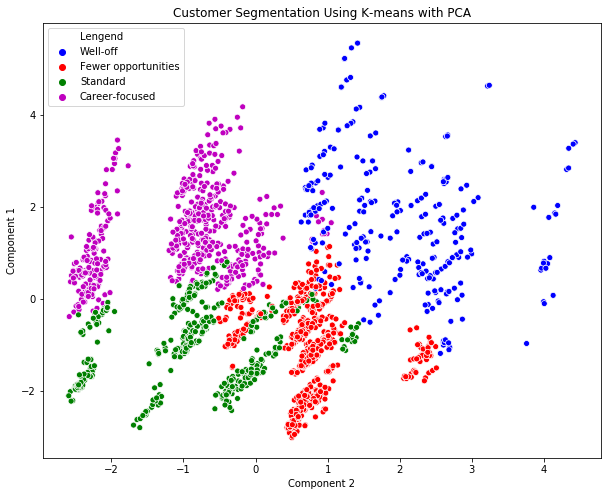

In [181]:
plt.figure(figsize=(10,8))
x=data_seg_pca_kmeans["Component 2"]
y=data_seg_pca_kmeans["Component 1"]
sns.scatterplot(x,y,hue=data_seg_pca_kmeans["Lengend"], palette=["b","r","g","m"])
plt.title("Customer Segmentation Using K-means with PCA")

## Data Export

In [184]:
pc.dump(scaler, open("scaler.pickle", "wb"))
pc.dump(pca, open("pca.pickle", "wb"))
pc.dump(kmeans_pca, open("kmeans_pca.pickle", "wb"))